# #Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df  = pd.read_csv("uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8918 non-null   int64  
 1   key                8918 non-null   object 
 2   fare_amount        8917 non-null   float64
 3   pickup_datetime    8917 non-null   object 
 4   pickup_longitude   8917 non-null   float64
 5   pickup_latitude    8917 non-null   float64
 6   dropoff_longitude  8917 non-null   float64
 7   dropoff_latitude   8917 non-null   float64
 8   passenger_count    8917 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 627.2+ KB


In [ ]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.shape #To get the total (Rows,Columns)

(8918, 7)

In [ ]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        8917 non-null   float64
 1   pickup_datetime    8917 non-null   object 
 2   pickup_longitude   8917 non-null   float64
 3   pickup_latitude    8917 non-null   float64
 4   dropoff_longitude  8917 non-null   float64
 5   dropoff_latitude   8917 non-null   float64
 6   passenger_count    8917 non-null   float64
dtypes: float64(6), object(1)
memory usage: 487.8+ KB


In [ ]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8917.00000,8917.000000,8917.000000,8917.000000,8917.000000,8917.000000
mean,11.44521,-72.700539,40.000828,-72.673399,40.005821,1.665358
std,10.41732,12.320446,5.895643,9.855862,5.880433,1.286880
min,2.50000,-748.016667,-74.009697,-75.350437,-73.994370,0.000000
25%,6.00000,-73.992015,40.734997,-73.991472,40.733642,1.000000
50%,8.50000,-73.981582,40.752407,-73.979908,40.752997,1.000000
75%,12.50000,-73.967155,40.767058,-73.963588,40.768180,2.000000
max,350.00000,40.770667,41.366138,40.761672,41.366138,6.000000


### Filling Missing values

In [ ]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

### To segregate each time of date and time

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [ ]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                 float64
day                  float64
month                float64
year                 float64
dayofweek            float64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

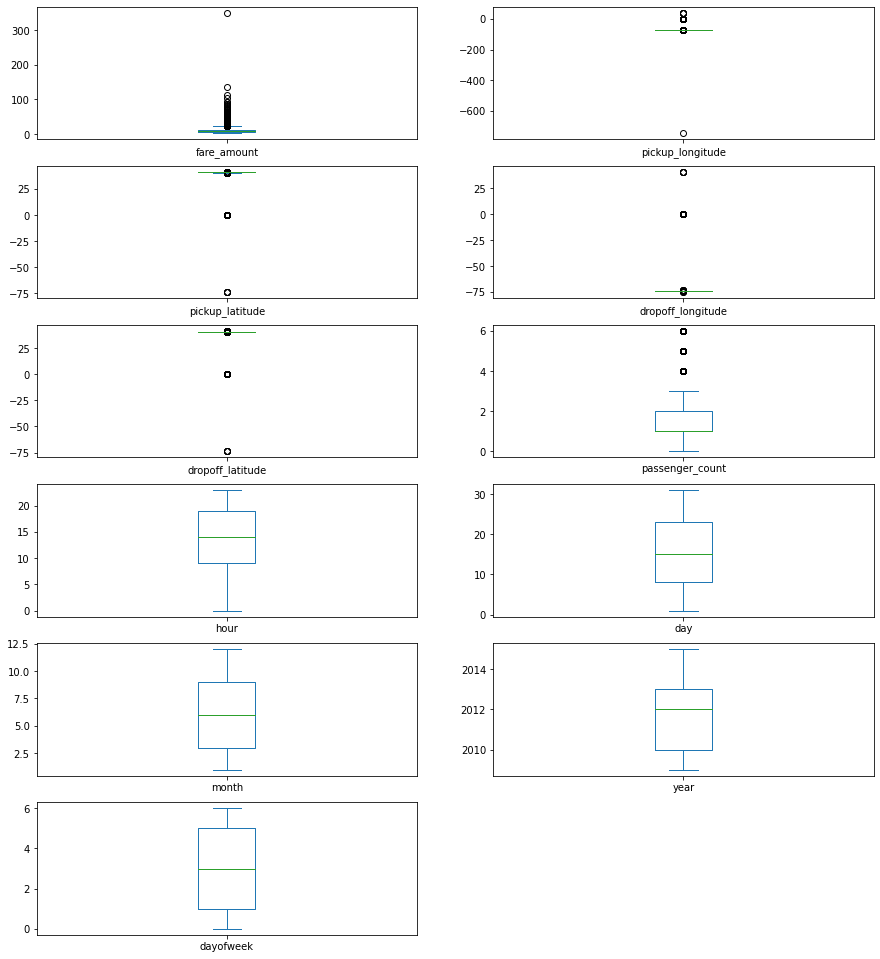

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [ ]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [ ]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

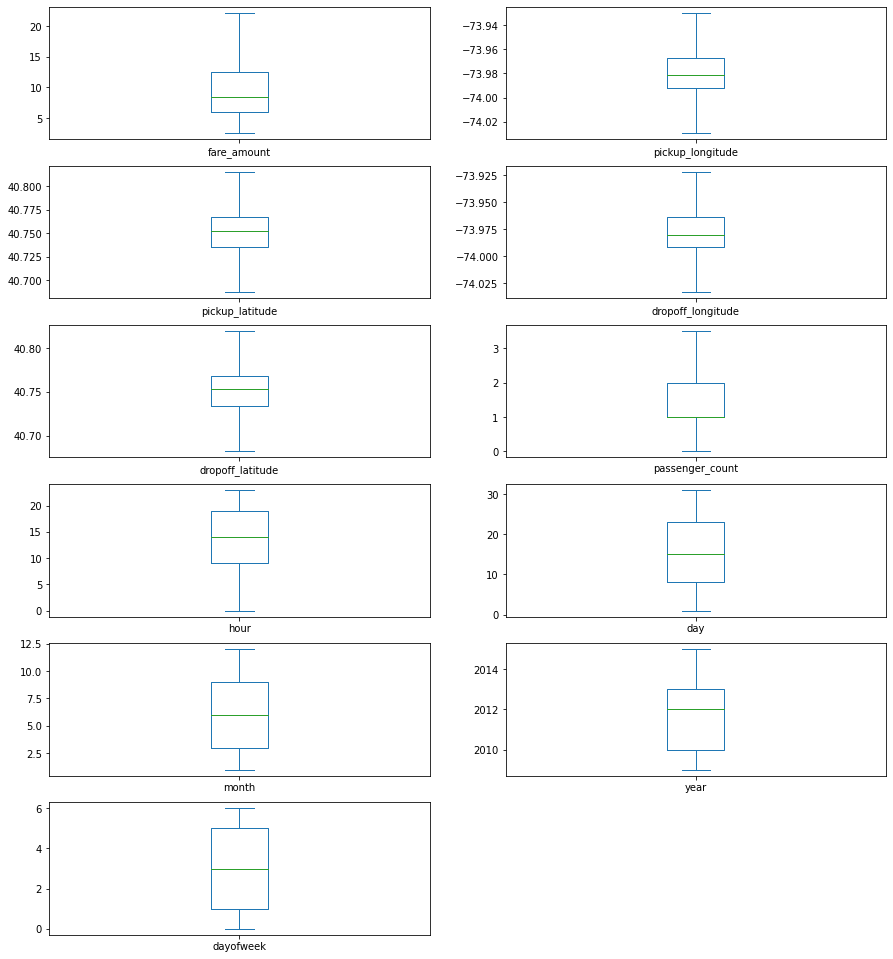

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [ ]:
#pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

ModuleNotFoundError: ignored

In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

In [ ]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull()) #Free for null values

In [ ]:
corr = df.corr() #Function to find the correlation

In [ ]:
corr

In [ ]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [ ]:
y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

In [ ]:
regression.intercept_ #To find the linear intercept

In [ ]:
regression.coef_ #To find the linear coeeficient

In [ ]:
prediction = regression.predict(X_test) #To predict the target values

In [ ]:
print(prediction)

In [ ]:
y_test

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,prediction)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,prediction)

In [ ]:
MSE 

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

### Metrics evaluatin for Random Forest

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random